In [127]:
! pip install pandas
! pip install numpy
! pip install transformers

huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)


You should consider upgrading via the '/Users/shreyanakum/Downloads/Aurora_Media/jp_env/bin/python -m pip install --upgrade pip' command.


huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)


You should consider upgrading via the '/Users/shreyanakum/Downloads/Aurora_Media/jp_env/bin/python -m pip install --upgrade pip' command.


huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)


You should consider upgrading via the '/Users/shreyanakum/Downloads/Aurora_Media/jp_env/bin/python -m pip install --upgrade pip' command.


In [1]:
import pandas as pd
import numpy as np
from transformers import pipeline
import statistics
from data.scraped_data import article_info, comments_content
import pathlib

CURRENT_PATH = pathlib.Path().resolve()

sentiment_classifier = pipeline("text-classification", model="cardiffnlp/twitter-roberta-base-sentiment-latest")

comments_df = pd.read_csv(f'{CURRENT_PATH}/data/comments.csv')
articles_df = pd.read_csv(f'{CURRENT_PATH}/data/article.csv')
tweets_df = pd.read_csv(f'{CURRENT_PATH}/data/tweets.csv')
events_df = pd.read_csv(f'{CURRENT_PATH}/data/events.csv')

/Users/shreyanakum/Downloads/Aurora_Media/jp_env/lib/python3.9/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm
/Users/shreyanakum/Downloads/Aurora_Media/jp_env/lib/python3.9/site-packages/torch/_utils.py:831: UserWarning: TypedStorage is deprecated. It will be removed in the future and UntypedStorage will be the only storage class. This should only matter to you if you are using storages directly.  To access UntypedStorage directly, use tensor.untyped_storage() instead of tensor.storage()
  return self.fget.__get__(instance, owner)()
Some weights of the model checkpoint at cardiffnlp/twitter-roberta-base-sentiment-latest were not used when initializing RobertaForSequenceClassification: ['roberta.pooler.dense.bias', 'roberta.pooler.dense.weight']
- This IS expected if you are initializing RobertaForSequenceClassificati

,1,2013-08-23,5,1124,harassment;sexual;mayor;filner;san
0,2,2013-08-24,2,5209,panda;birth
1,3,2013-08-24,4,13287,francisco;mayor;emergency;san
2,4,2013-08-24,2,8307,anniversary;50th
3,5,2013-08-24,2,12488,wildfire;yosemite
4,6,2013-08-24,2,3311,website;dhs


In [11]:
tweet_ids = np.array(tweets_df.iloc[:, 0])
event_ids = np.array(tweets_df.iloc[:, 1])
print('\n')
events_df.head()

[   1    1    1 ... 5234 5234 5234]




,1,2013-08-23,5,1124,harassment;sexual;mayor;filner;san
0,2,2013-08-24,2,5209,panda;birth
1,3,2013-08-24,4,13287,francisco;mayor;emergency;san
2,4,2013-08-24,2,8307,anniversary;50th
3,5,2013-08-24,2,12488,wildfire;yosemite
4,6,2013-08-24,2,3311,website;dhs


In [129]:
comments = np.array(comments_df['content'])
article_titles = np.array(articles_df['content'])
articles_sources = np.array(articles_df['username'])
article_ids_from_comments = np.array(comments_df['tweetlink'])

article_title_and_id = dict()
for article in article_info:
    article_id = article['id']
    article_name = article['content']
    article_title_and_id[article_id] = article_name.replace('\n', '')

for i in article_title_and_id:
    print(f'{i}\n{article_title_and_id[i]}\n\n')

1766242996469506355
How Charlie Munger made his first $1,000,000, explained by ChatGPT: https://t.co/l5VJjWkcVb


1766237958279938355
OpenAI’s success has also put a massive target on its back. 🎯The company faces many headwinds, ranging from lawsuits and government investigations to increasing competition from established players like Google. https://t.co/ye6T72QYnK


1766223981567262741
"There's a lack of volume in the marketplace right now," Box Office Guru Founder @GiteshPandya says. "That will get corrected by the time we reach the second quarter into the summer. ... It's been a very poor first quarter." https://t.co/GnQnrIUA3w


1766221164311970083
The typical person spends more time planning a vacation than they do planning for retirement."Don't wait," $JPM Asset Management's Michael Conrath says on retirement, adding: "Small contributions add up to meaningful dollars over time." https://t.co/z9oE51X65G


1766215482380620097
"We had a fantastic quarter," $AVAV CEO Wahid Nawabi sa

In [130]:
article_and_comments = dict() # has keys as article names & values as a list of the comments related to it

for comment in comments:
    if comment in article_titles:
        title = comment
        article_and_comments[title] = []
        
    elif comment not in article_titles:
        article_and_comments[title].append(comment)

for article in list(article_title_and_id.values()):
    article_and_comments[article] = []

for comments in comments_content:
    article_id = comments['tweetid']
    comments_cont = comments['content']
    article_and_comments[article_title_and_id[article_id]].append(comments_cont.replace('\n', '.'))

for i in article_and_comments:
    print(f'{i}\n{article_and_comments[i]}\n\n')

NEW: Sam Altman has been pushed out of AI juggernaut Open AI after an internal review found he had not been “consistently candid” with his representations to the board.

Read the latest: trib.al/p83NQ63
['Sam Altman', 'good morning', 'Wrong prompt :/', 'Not being candid is bad', 'Meaning he is not trustworthy', 'The next Steve Jobs story?  🤔', 'So why did you invite him back?', 'Trust is very important', 'Thật  không  phải  người  đáng  tin', "I'm basking in the glow of contentment and happiness."]


If the possibility of a large, unexpected vet bill worries you, consider pet insurance as a financial safety net. trib.al/xUSmNcp via @ForbesAdvisor
['invidious.projectsegfau.lt/watch?v=0zu-AuBf…']


The High Anxiety Of Holding On To Your Job And The Great Apprehension Of Losing It trib.al/PTPG14u
["That's very great idea", 'invidious.projectsegfau.lt/watch?v=0zu-AuBf…']


One of the richest women in the world, Elisabeth DeLuca is worth an estimated $8.2 billion but she’s far from a househ

In [131]:
pruned_article_and_comments = {}

for article in article_and_comments:
     if len(article_and_comments[article]) != 0 or article_and_comments[article] != []:
          pruned_article_and_comments[article] = article_and_comments[article]

old_article_and_comments = dict(article_and_comments)
article_and_comments = dict(pruned_article_and_comments)

for article in article_and_comments:
     for comment_index in range(0,len(article_and_comments[article])):
          comment = article_and_comments[article][comment_index]
          sentiment = sentiment_classifier(str(comment))
          if sentiment[0]['label'] == 'neutral': 
               index = comment_index
               article_and_comments[article][index] = np.nan # pruning it
          else:
               article_and_comments[article][comment_index] = sentiment

In [132]:
for i in article_and_comments:
    print(f'{i}\n{article_and_comments[i]}\n\n')

NEW: Sam Altman has been pushed out of AI juggernaut Open AI after an internal review found he had not been “consistently candid” with his representations to the board.

Read the latest: trib.al/p83NQ63
[nan, [{'label': 'positive', 'score': 0.8494128584861755}], [{'label': 'negative', 'score': 0.8968726992607117}], [{'label': 'negative', 'score': 0.767464280128479}], [{'label': 'negative', 'score': 0.7088561654090881}], nan, nan, [{'label': 'positive', 'score': 0.845388650894165}], nan, [{'label': 'positive', 'score': 0.980981707572937}]]


If the possibility of a large, unexpected vet bill worries you, consider pet insurance as a financial safety net. trib.al/xUSmNcp via @ForbesAdvisor
[nan]


The High Anxiety Of Holding On To Your Job And The Great Apprehension Of Losing It trib.al/PTPG14u
[[{'label': 'positive', 'score': 0.965976357460022}], nan]


One of the richest women in the world, Elisabeth DeLuca is worth an estimated $8.2 billion but she’s far from a household name and there

In [133]:
# label = 'positive'
def average_sentiment_label(label: str, article: str):
    scores = []
    for sentiment in article_and_comments[article]:
        if sentiment is np.nan:
            pass
        else:
            if sentiment[0]['label'] == label:
                scores.append(sentiment[0]['score'])
    if len(scores) > 0:
        mean = statistics.mean(scores)
    else:
        mean = np.nan
    return mean

def score_to_labels(label: str, score: float):
    if score is np.nan:
        return np.nan
    elif label == 'positive':
        new_score = int(score * 10)
    elif label == 'negative':
        new_score = int(score * -10)
    return new_score

def average_sentiment_articles():
    articles_and_sentiments = dict()
    for article in article_and_comments:
        average_positive_score = average_sentiment_label('positive', article)
        average_negative_score = average_sentiment_label('negative', article)
        if average_positive_score is np.nan and average_negative_score is np.nan:
            articles_and_sentiments[article.replace(',', '').replace('\n', '')] = np.nan
        elif average_negative_score is np.nan:
            positive_label = score_to_labels('positive', average_positive_score)
            articles_and_sentiments[article.replace(',', '').replace('\n', '')] = positive_label
        elif average_positive_score > average_negative_score:
            positive_label = score_to_labels('positive', average_positive_score)
            articles_and_sentiments[article.replace(',', '').replace('\n', '')] = positive_label
        elif average_positive_score is np.nan:
            negative_label = score_to_labels('negative', average_negative_score)
            articles_and_sentiments[article.replace(',', '').replace('\n', '')] = negative_label
        elif average_positive_score < average_negative_score:
            negative_label = score_to_labels('negative', average_negative_score)
            articles_and_sentiments[article.replace(',', '').replace('\n', '')] = negative_label
    
    return articles_and_sentiments



In [134]:
articles_and_labels = average_sentiment_articles() # Dictionary with articles & avg. sentiments
for i in articles_and_labels:
    print(f'{i}\n{articles_and_labels[i]}\n\n')

NEW: Sam Altman has been pushed out of AI juggernaut Open AI after an internal review found he had not been “consistently candid” with his representations to the board.Read the latest: trib.al/p83NQ63
8


If the possibility of a large unexpected vet bill worries you consider pet insurance as a financial safety net. trib.al/xUSmNcp via @ForbesAdvisor
nan


The High Anxiety Of Holding On To Your Job And The Great Apprehension Of Losing It trib.al/PTPG14u
9


One of the richest women in the world Elisabeth DeLuca is worth an estimated $8.2 billion but she’s far from a household name and there are just a handful of photos of her online. trib.al/vDg0E1e
6


How Rob Gronkowski Is Thriving In Business After The NFL trib.al/2PWwwph by @ScottKingMedia
8


While "startup" conjures up images of founders in their twenties making a go of it in their college dorm rooms entrepreneurship isn’t just for the young. In fact the trend for older individuals to create and run a thriving business is accelera

### Create a CSV file holding the dictionary

In [135]:
import csv

In [136]:
with open('articles_and_labels_raw.csv', 'w', newline='') as csvfile:
    filewriter = csv.writer(csvfile, delimiter=',',
                            quotechar='|', quoting=csv.QUOTE_MINIMAL)
    filewriter.writerow(['Article Title', 'Label'])
    
    for article_title in articles_and_labels:
        label = articles_and_labels[article_title]
        filewriter.writerow([f'{article_title}', f'{label}'])

# Deep Learning

Goes through the labels and makes sure that one of them is not being over-represented in the data. Places the maximum amount of one label being shown as UPPER_LIMIT (which is 10).

In [137]:
UPPER_LIMIT = 10

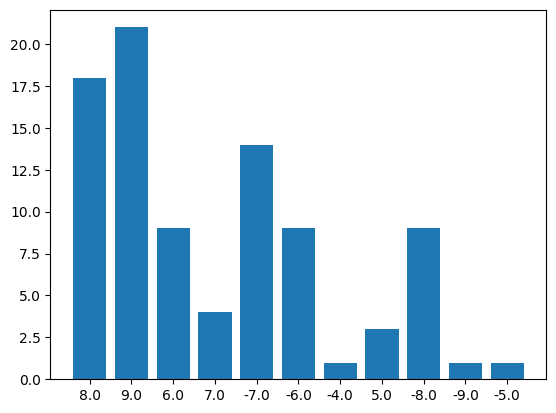

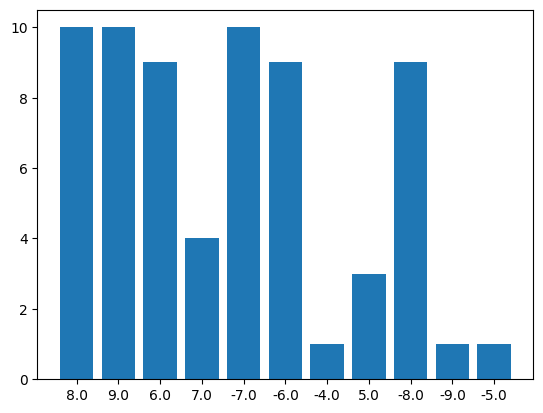

In [138]:
raw_df_articles_and_labels = pd.read_csv(f'{CURRENT_PATH}/articles_and_labels_raw.csv').dropna()
raw_df_articles_and_labels.head()

import matplotlib.pyplot as plt

count = {}
for label in raw_df_articles_and_labels['Label']:
    if label in count:
        count[label] += 1
    else:
        count[label] = 1

names = list(count.keys())
values = list(count.values())

plt.bar(range(len(count)), values, tick_label=names)
plt.show()

balanced_labeled_data = {}
balanced_labeled_data_with_article_names = {}

for label_index in range(len(raw_df_articles_and_labels['Article Title'])):
    label = list(raw_df_articles_and_labels['Label'])[label_index]
    article_name = list(raw_df_articles_and_labels['Article Title'])[label_index]
    if label in balanced_labeled_data:
        if balanced_labeled_data[label] == UPPER_LIMIT:
            continue
        elif balanced_labeled_data[label] < UPPER_LIMIT:
            balanced_labeled_data_with_article_names[article_name] = label
            balanced_labeled_data[label] += 1
    else:
        balanced_labeled_data_with_article_names[article_name] = label
        balanced_labeled_data[label] = 1

names = list(balanced_labeled_data.keys())
values = list(balanced_labeled_data.values())

plt.bar(range(len(balanced_labeled_data)), values, tick_label=names)
plt.show()


with open('articles_and_labels.csv', 'w', newline='') as csvfile:
    filewriter = csv.writer(csvfile, delimiter=',',
                            quotechar='|', quoting=csv.QUOTE_MINIMAL)
    filewriter.writerow(['Article Title', 'Label'])
    
    for article_title in balanced_labeled_data_with_article_names.keys():
        label = balanced_labeled_data_with_article_names[article_title]
        filewriter.writerow([f'{article_title}', f'{label}'])

df_articles_and_labels = pd.read_csv(f'{CURRENT_PATH}/articles_and_labels.csv')

In [139]:
! pip install fast_ml==3.68
! pip install datasets

huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)


You should consider upgrading via the '/Users/shreyanakum/Downloads/Aurora_Media/jp_env/bin/python -m pip install --upgrade pip' command.


huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)


You should consider upgrading via the '/Users/shreyanakum/Downloads/Aurora_Media/jp_env/bin/python -m pip install --upgrade pip' command.


In [140]:
from fast_ml.model_development import train_valid_test_split
from transformers import Trainer, TrainingArguments, AutoConfig, AutoTokenizer, AutoModelForSequenceClassification
import torch
from torch import nn
from torch.nn.functional import softmax
from sklearn.metrics import classification_report
from sklearn.preprocessing import LabelEncoder
import datasets

In [141]:
DEVICE = torch.device("cuda" if torch.cuda.is_available() else "cpu")
print (f'Device Availble: {DEVICE}')

Device Availble: cpu


In [142]:
df_articles_and_labels = df_articles_and_labels.loc[:, ['Article Title', 'Label']].dropna()

In [143]:
# Encoding the labels column
le = LabelEncoder()
df_articles_and_labels['Label'] = le.fit_transform(df_articles_and_labels['Label'])
df_articles_and_labels.head()
# Numbers in Label are the class id for the class labels which will be used to train the model. 
# Each of the class id corresponds to a label.

,Article Title,Label
0,NEW: Sam Altman has been pushed out of AI jugg...,9
1,The High Anxiety Of Holding On To Your Job And...,10
2,One of the richest women in the world Elisabet...,7
3,How Rob Gronkowski Is Thriving In Business Aft...,9
4,"While ""startup"" conjures up images of founders...",9


In [144]:
# Split the data into train, validation and test in the ratio of 80%, 10% and 10%
(train_texts, train_labels,
 val_texts, val_labels,
 test_texts, test_labels) = train_valid_test_split(df_articles_and_labels, target = 'Label', train_size=0.8, valid_size=0.1, test_size=0.1)

In [145]:
# Convert the review text from pandas series to list of sentences
train_texts = train_texts['Article Title'].to_list()
train_labels = train_labels.to_list()
val_texts = val_texts['Article Title'].to_list()
val_labels = val_labels.to_list()
test_texts = test_texts['Article Title'].to_list()
test_labels = test_labels.to_list()


In [146]:
# Create a DataLoader class for processing and loading of the data during training and inference phase
class DataLoader(torch.utils.data.Dataset):
    def __init__(self, sentences=None, labels=None):
        self.sentences = sentences
        self.labels = labels
        self.tokenizer = AutoTokenizer.from_pretrained('distilbert-base-uncased')
        
        if bool(sentences):
            self.encodings = self.tokenizer(self.sentences,
                                            truncation = True,
                                            padding = True)
        
    def __getitem__(self, idx):
        item = {key: torch.tensor(val[idx]) for key, val in self.encodings.items()}
        
        if self.labels == None:
            item['labels'] = None
        else:
            item['labels'] = torch.tensor(self.labels[idx])
        return item
    def __len__(self):
        return len(self.sentences)
    
    
    def encode(self, x):
        return self.tokenizer(x, return_tensors = 'pt').to(DEVICE)


In [147]:
# DataLoader initializes a pretrained tokenizer and encodes the article titles
train_dataset = DataLoader(train_texts, train_labels)
val_dataset = DataLoader(val_texts, val_labels)
test_dataset = DataLoader(test_texts, test_labels)

In [148]:
# got a single record from the DataLoader by using the __getitem__ function.
# result after an article title is tokenized
print (train_dataset.__getitem__(2))

{'input_ids': tensor([  101,  3731,  7349,  2343,  6294,  6868, 10173,  9317,  2008,  1996,
         4130,  2091,  2000,  1996,  2430,  2924,  1521,  1055,  1016,  1003,
        14200,  3125,  2071,  3613,  2000,  2022,  1000, 16906,  2100,  1000,
         2021,  2008,  2009,  2097,  2145,  3497,  2468,  6413,  2000,  4088,
         6276,  6165,  1000,  2101,  2023,  2095,  1012,  1000, 16770,  1024,
         1013,  1013,  1056,  1012,  2522,  1013, 20315,  3501,  8525,  3567,
         3501,  9048,   102,     0,     0,     0,     0,     0,     0,     0,
            0,     0,     0,     0,     0,     0,     0,     0,     0,     0,
            0,     0,     0]), 'attention_mask': tensor([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
        1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
        1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]), 'labels': tensor(2)}


In [149]:
# Define evaluation metrics
f1 = datasets.load_metric('f1')
accuracy = datasets.load_metric('accuracy')
precision = datasets.load_metric('precision')
recall = datasets.load_metric('recall')
def compute_metrics(eval_pred):
    metrics_dict = {}
    predictions, labels = eval_pred
    predictions = np.argmax(predictions, axis=1)
    
    metrics_dict.update(f1.compute(predictions = predictions, references = labels, average = 'macro'))
    metrics_dict.update(accuracy.compute(predictions = predictions, references = labels))
    metrics_dict.update(precision.compute(predictions = predictions, references = labels, average = 'macro'))
    metrics_dict.update(recall.compute(predictions = predictions, references = labels, average = 'macro'))
    return metrics_dict

## Training

In [150]:
id2label = {idx:label for idx, label in enumerate(le.classes_)}
label2id = {label:idx for idx, label in enumerate(le.classes_)}
config = AutoConfig.from_pretrained('distilbert-base-uncased',
                                    num_labels = 11,
                                    id2label = id2label,
                                    label2id = label2id)
model = AutoModelForSequenceClassification.from_config(config)

In [151]:
print (config)


DistilBertConfig {
  "_name_or_path": "distilbert-base-uncased",
  "activation": "gelu",
  "architectures": [
    "DistilBertForMaskedLM"
  ],
  "attention_dropout": 0.1,
  "dim": 768,
  "dropout": 0.1,
  "hidden_dim": 3072,
  "id2label": {
    "0": -9.0,
    "1": -8.0,
    "2": -7.0,
    "3": -6.0,
    "4": -5.0,
    "5": -4.0,
    "6": 5.0,
    "7": 6.0,
    "8": 7.0,
    "9": 8.0,
    "10": 9.0
  },
  "initializer_range": 0.02,
  "label2id": {
    "-9.0": 0,
    "-8.0": 1,
    "-7.0": 2,
    "-6.0": 3,
    "-5.0": 4,
    "-4.0": 5,
    "5.0": 6,
    "6.0": 7,
    "7.0": 8,
    "8.0": 9,
    "9.0": 10
  },
  "max_position_embeddings": 512,
  "model_type": "distilbert",
  "n_heads": 12,
  "n_layers": 6,
  "pad_token_id": 0,
  "qa_dropout": 0.1,
  "seq_classif_dropout": 0.2,
  "sinusoidal_pos_embds": false,
  "tie_weights_": true,
  "transformers_version": "4.37.2",
  "vocab_size": 30522
}



In [152]:
print (model)

DistilBertForSequenceClassification(
  (distilbert): DistilBertModel(
    (embeddings): Embeddings(
      (word_embeddings): Embedding(30522, 768, padding_idx=0)
      (position_embeddings): Embedding(512, 768)
      (LayerNorm): LayerNorm((768,), eps=1e-12, elementwise_affine=True)
      (dropout): Dropout(p=0.1, inplace=False)
    )
    (transformer): Transformer(
      (layer): ModuleList(
        (0-5): 6 x TransformerBlock(
          (attention): MultiHeadSelfAttention(
            (dropout): Dropout(p=0.1, inplace=False)
            (q_lin): Linear(in_features=768, out_features=768, bias=True)
            (k_lin): Linear(in_features=768, out_features=768, bias=True)
            (v_lin): Linear(in_features=768, out_features=768, bias=True)
            (out_lin): Linear(in_features=768, out_features=768, bias=True)
          )
          (sa_layer_norm): LayerNorm((768,), eps=1e-12, elementwise_affine=True)
          (ffn): FFN(
            (dropout): Dropout(p=0.1, inplace=False)
 

In [153]:
training_args = TrainingArguments(
    output_dir=f'{CURRENT_PATH}/deep_learning/results',
    num_train_epochs=10,
    per_device_train_batch_size=64,
    per_device_eval_batch_size=64,
    warmup_steps=500,
    weight_decay=0.05,
    report_to='none',
    evaluation_strategy='steps',
    logging_dir=f'{CURRENT_PATH}/deep_learning/logs',
    logging_steps=50)


In [154]:
trainer = Trainer(
    model=model,
    args=training_args,
    train_dataset=train_dataset,
    eval_dataset=val_dataset,
    compute_metrics=compute_metrics)


In [155]:
trainer.train()

100%|██████████| 10/10 [00:06<00:00,  1.47it/s]

{'train_runtime': 6.8163, 'train_samples_per_second': 77.755, 'train_steps_per_second': 1.467, 'train_loss': 2.4133255004882814, 'epoch': 10.0}


TrainOutput(global_step=10, training_loss=2.4133255004882814, metrics={'train_runtime': 6.8163, 'train_samples_per_second': 77.755, 'train_steps_per_second': 1.467, 'train_loss': 2.4133255004882814, 'epoch': 10.0})

## Evaluation

In [156]:
test_results = trainer.predict(test_dataset)

  0%|          | 0/1 [00:00<?, ?it/s]

100%|██████████| 1/1 [00:00<00:00, 15.36it/s]


In [157]:
print (test_results.predictions)
print (test_results.label_ids)
print (test_results.metrics)

[[ 0.34615102 -0.13779324  0.34997305  0.07913379  0.0153196  -0.2106547
  -0.42873532 -0.01683178 -0.1705894   0.10449963  0.16990297]
 [ 0.37133107 -0.11887146  0.34353563  0.0559661   0.05685961 -0.22621204
  -0.36221874  0.00653683 -0.16488865  0.14822274  0.1589634 ]
 [ 0.381531   -0.12899281  0.32481608  0.09399643  0.03121678 -0.17640717
  -0.3672821   0.03713997 -0.20672812  0.13618731  0.13746046]
 [ 0.3425656  -0.13372947  0.33602682  0.07260198  0.04888092 -0.1877611
  -0.39612275  0.00662566 -0.18213029  0.1432892   0.13742161]
 [ 0.3635103  -0.09013904  0.31268945  0.0830956   0.00747749 -0.17272611
  -0.37929198  0.00260688 -0.17634055  0.16294871  0.1632171 ]
 [ 0.35771298 -0.11802587  0.32090327  0.0474299   0.02079029 -0.22345151
  -0.3782597  -0.01144148 -0.18723361  0.12542176  0.14459744]
 [ 0.3256153  -0.12446934  0.33235157  0.09282891  0.01938353 -0.19253576
  -0.36832082  0.02242087 -0.1711256   0.14120646  0.12503159]]
[2 9 9 1 4 8 8]
{'test_loss': 2.4178445339

In [158]:
label2id_mapper = model.config.id2label
proba = softmax(torch.from_numpy(test_results.predictions))
pred = [label2id_mapper[i] for i in torch.argmax(proba, dim = -1).numpy()]
actual = [label2id_mapper[i] for i in test_results.label_ids]


In [159]:
class_report = classification_report(actual, pred, output_dict = True)
pd.DataFrame(class_report)


,-9.0,-8.0,-7.0,-5.0,7.0,8.0,accuracy,macro avg,weighted avg
precision,0.0,0.0,0.500000,0.0,0.0,0.0,0.142857,0.083333,0.071429
recall,0.0,0.0,1.000000,0.0,0.0,0.0,0.142857,0.166667,0.142857
f1-score,0.0,0.0,0.666667,0.0,0.0,0.0,0.142857,0.111111,0.095238
support,0.0,1.0,1.000000,1.0,2.0,2.0,0.142857,7.000000,7.000000


# Saving the Model

In [160]:
trainer.save_model(f'{CURRENT_PATH}/deep_learning/working')